In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df0 = pd.read_csv("df_city_bikes.csv")
df1 = pd.read_csv("pain.csv")
df1 = df1.iloc[:, 1:]

In [3]:
numbers = ['0','1','2','3','4','5','6','7','8','9']

In [4]:
df1.shape

(23, 50)

In [5]:
df1.fillna('', inplace = True)
df1.shape

(23, 50)

In [6]:
df1.keys()


Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28', '29', '30', '31', '32', '33', '34', '35', '36',
       '37', '38', '39', '40', '41', '42', '43', '44', '45', '46', '47', '48',
       '49'],
      dtype='object')

In [7]:
def extractNum(str):
    comma = False
    ln = []
    for char in str:
        if comma == True and char != ' ' and char != ']' and char in ['0','1','2','3','4','5','6','7','8','9']:
            ln.append(char)
        if char == ',':
            comma = True
    num = getNum(ln)
    return num
    

def getNum(list):
    s = map(str,list)
    s = ''.join(list)
    s = int(s)
    return s

In [8]:
print(extractNum(df1.loc[0]['0']))

7833


In [9]:
len(df1)

23

In [10]:
avgs = []
for x in range(len(df1)):
    total = 0
    count = 0
    for item in df1.loc[x]:
        if item != '':
            print(type(item))
            total += extractNum(item)
            count += 1
    avgs.append(total/count)
avgs

<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class 'str'>
<class

[2441.9166666666665,
 4332.770833333333,
 3408.0833333333335,
 2580.8979591836733,
 4291.729166666667,
 3422.2291666666665,
 1892.936170212766,
 1878.0,
 5460.285714285715,
 2179.4666666666667,
 3720.3061224489797,
 2050.387755102041,
 2481.9791666666665,
 1959.6521739130435,
 3831.5510204081634,
 2639.68085106383,
 1756.0416666666667,
 2846.408163265306,
 1695.6530612244899,
 4395.9375,
 1697.6734693877552,
 2006.591836734694,
 2133.4285714285716]

In [11]:
df0 = df0[['latitude','longitude','free_bikes','empty_slots']]
df0

,latitude,longitude,free_bikes,empty_slots
0,24.451202,54.334510,2,4
1,24.456953,54.615754,3,12
2,24.465954,54.598305,4,2
3,24.486103,54.350087,3,6
4,24.452079,54.604651,1,2
5,24.465793,54.609610,1,3
6,24.465680,54.328189,6,6
7,24.465272,54.328835,2,3
8,24.430102,54.622225,2,4
9,24.471234,54.323041,2,8


In [12]:
df0['avg_distance'] = avgs
df0['total_bikes'] = df0['free_bikes'] + df0['empty_slots']

In [13]:
dfFinal = df0
dfFinal.sort_values(by='avg_distance')

,latitude,longitude,free_bikes,empty_slots,avg_distance,total_bikes
18,24.492090,54.366101,2,12,1695.653061,14
20,24.498709,54.368072,1,8,1697.673469,9
16,24.496235,54.373636,1,13,1756.041667,14
7,24.465272,54.328835,2,3,1878.000000,5
6,24.465680,54.328189,6,6,1892.936170,12
13,24.485254,54.608061,1,6,1959.652174,7
21,24.507333,54.376300,1,9,2006.591837,10
11,24.495664,54.358364,1,13,2050.387755,14
22,24.488090,54.356111,6,1,2133.428571,7
9,24.471234,54.323041,2,8,2179.466667,10


In [66]:
dfFinal.to_csv('csvFinal.csv')

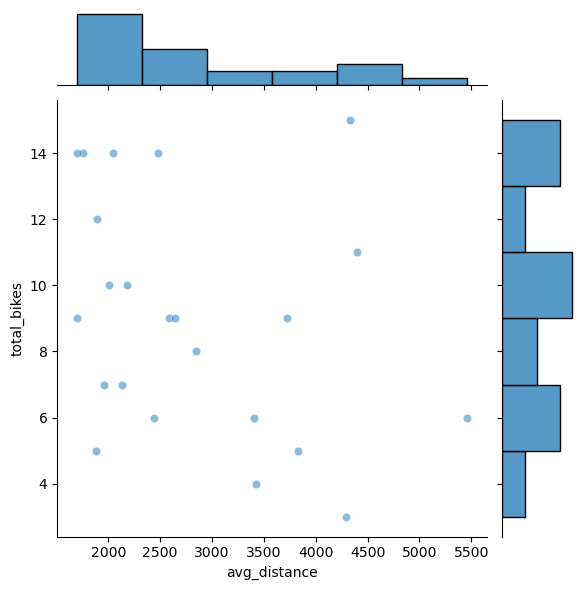

In [14]:
sns.jointplot(x="avg_distance", y="total_bikes", data=dfFinal, alpha=0.5)

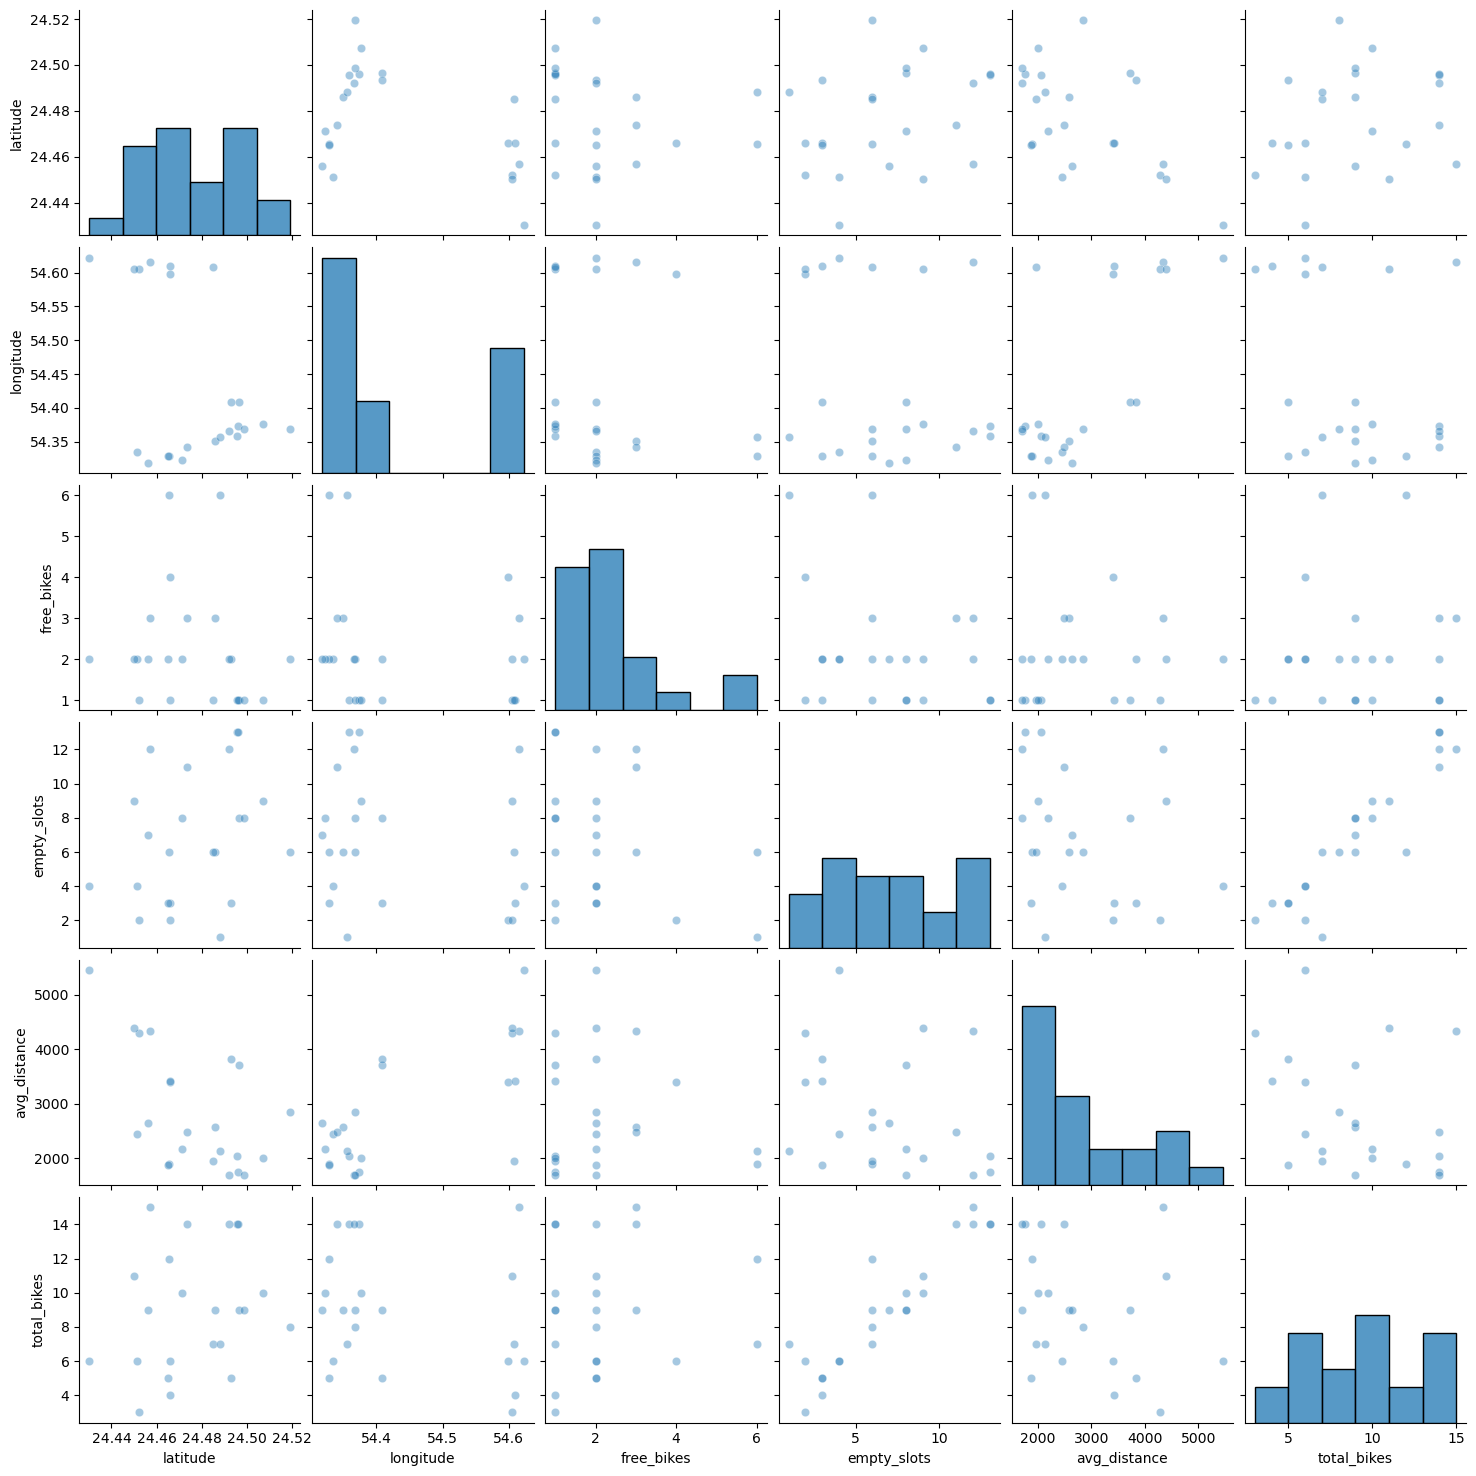

In [15]:
sns.pairplot(dfFinal, kind='scatter', plot_kws={'alpha': 0.4})

In [16]:
from sklearn.model_selection import train_test_split

In [17]:
X = dfFinal[['latitude','longitude', 'free_bikes','empty_slots','total_bikes']]
Y = dfFinal['avg_distance']

In [35]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)
print(X_train)

     latitude  longitude  free_bikes  empty_slots  total_bikes
13  24.485254  54.608061           1            6            7
5   24.465793  54.609610           1            3            4
2   24.465954  54.598305           4            2            6
11  24.495664  54.358364           1           13           14
20  24.498709  54.368072           1            8            9
3   24.486103  54.350087           3            6            9
4   24.452079  54.604651           1            2            3
18  24.492090  54.366101           2           12           14
16  24.496235  54.373636           1           13           14
21  24.507333  54.376300           1            9           10
22  24.488090  54.356111           6            1            7
7   24.465272  54.328835           2            3            5
10  24.496565  54.408766           1            8            9
14  24.493276  54.408307           2            3            5
19  24.450142  54.605276           2            9      

In [37]:
Y_train

13    1959.652174
5     3422.229167
2     3408.083333
11    2050.387755
20    1697.673469
3     2580.897959
4     4291.729167
18    1695.653061
16    1756.041667
21    2006.591837
22    2133.428571
7     1878.000000
10    3720.306122
14    3831.551020
19    4395.937500
6     1892.936170
Name: avg_distance, dtype: float64

In [39]:
Y_test

15    2639.680851
9     2179.466667
0     2441.916667
8     5460.285714
17    2846.408163
12    2481.979167
1     4332.770833
Name: avg_distance, dtype: float64

In [41]:
from sklearn.linear_model import LinearRegression

In [43]:
lm = LinearRegression()

In [45]:
lm.fit(X_train,Y_train)

LinearRegression()

In [47]:
lm.coef_

array([-1.39310613e+04,  3.22545830e+03, -5.57774367e+01, -5.87640123e-02,
       -5.58362007e+01])

In [49]:
cdf = pd.DataFrame(lm.coef_,X.columns, columns=['Coef'])
print(cdf)

                     Coef
latitude    -13931.061323
longitude     3225.458305
free_bikes     -55.777437
empty_slots     -0.058764
total_bikes    -55.836201


In [51]:
predictions = lm.predict(X_test)

In [53]:
predictions

array([2623.83312107, 2371.38375156, 2911.02341214, 4132.98336077,
       1955.70014224, 2117.55202389, 3179.27364137])

<Axes: ylabel='avg_distance'>

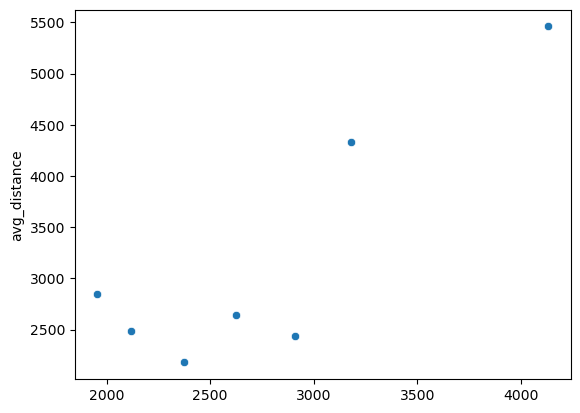

In [55]:
sns.scatterplot(x = predictions, y = Y_test)

In [57]:
from sklearn.metrics import mean_squared_error, mean_absolute_error
import math

In [59]:
print("Mean Absolute Error: ", mean_absolute_error(Y_test, predictions))
print("Mean Squared Error: ", mean_squared_error(Y_test, predictions))
print("Root Mean Squared Error: ",math.sqrt(mean_squared_error(Y_test, predictions)))

Mean Absolute Error:  630.400895661829
Mean Squared Error:  610799.9553244415
Root Mean Squared Error:  781.5369187213369
